In [1]:
import autograd.numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Defining some activation functions
def ReLU(z):
    return np.where(z > 0, z, 0)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def softmax(z):
    """Compute softmax values for each set of scores in the rows of the matrix z.
    Used with batched input data."""
    e_z = np.exp(z - np.max(z, axis=0))
    return e_z / np.sum(e_z, axis=1)[:, np.newaxis]

def softmax_vec(z):
    """Compute softmax values for each set of scores in the vector z.
    Use this function when you use the activation function on one vector at a time"""
    e_z = np.exp(z - np.max(z))
    return e_z / np.sum(e_z)

# Exercise 1

**a) Given the shape of the first layer weight matrix, what is the input shape of the neural network? What is the output shape of the first layer?** \\

Since the input data is a 2-dim vector, the input shape of the neural network is 2 (neurons). The Weight Matrix shape is 4$\times$2, then the output shape of the first layer is 4 (neurons).

In [2]:
#Initial data
np.random.seed(2024)
x = np.random.randn(2)
W1 = np.random.randn(4, 2)

# b) Define the bias of the first layer
b1 = np.random.randn(4)

# c) Compute the intermediary z1 for the first layer
z1 = np.dot(W1, x) + b1

# d) Compute the activation a1 for the first layer using the ReLU activation function
a1 = ReLU(z1)

sol1 = np.array([0.60610368, 4.0076268, 0.0, 0.56469864])

#Check results
print(a1)
print(sol1)
print(np.allclose(a1, sol1))

[0.60610368 4.0076268  0.         0.56469864]
[0.60610368 4.0076268  0.         0.56469864]
True


# Exercise 2

**a)  What is the input of the second layer? What is its shape?**

The input consist of eight neurons, therefore the second layer has a shape of 8$×$1.

In [3]:
#b)  Define the weight and bias of the second layer with the right shapes.
W2 = np.random.randn(8, 4)
b2 = np.random.randn(8)

#c) Compute the intermediary z2 and activation a2 for the second layer.
z2 = np.dot(W2, a1) + b2
a2 = ReLU(z2)

#Check the results
print(
    np.allclose(np.exp(len(a2)), 2980.9579870417283)
)  # This should evaluate to True if a2 has the correct shape :)

True


# Exercise 3

**a) Complete the function below so that it returns a list layers of weight and bias tuples (W, b) for each layer, in order, with the correct shapes that we can use later as our network parameters.**

In [4]:
def create_layers(network_input_size, layer_output_sizes):
    layers = []

    i_size = network_input_size
    for layer_output_size in layer_output_sizes:
        W = np.random.randn(layer_output_size, i_size)
        b = np.random.randn(layer_output_size)
        layers.append((W, b))

        i_size = layer_output_size
    return layers

**b) Comple the function below so that it evaluates the intermediary z and activation a for each layer, with ReLU actication, and returns the final activation a. This is the complete feed-forward pass, a full neural network!**

In [5]:
def feed_forward_all_relu(layers, input):
    a = input
    for W, b in layers:
        z = W @ a + b
        a = ReLU(z)
    return a

**c) Create a network with input size 8 and layers with output sizes 10, 16, 6, 2. Evaluate it and make sure that you get the correct size vectors along the way.**

In [6]:
input_size = 8
layer_output_sizes = [10, 16, 6, 2]

x = np.random.rand(input_size)
layers = create_layers(input_size, layer_output_sizes)
predict = feed_forward_all_relu(layers, x)

#Check the shapes of the layers
print(f"Layer {0} |  Input shape: {input_size}")
for i, (W, b) in enumerate(layers):
    print(f"Layer {i+1} |  W-shape: {W.shape}   b-shape: {b.shape}")
print("\n")

#Check the results
print(predict)

Layer 0 |  Input shape: 8
Layer 1 |  W-shape: (10, 8)   b-shape: (10,)
Layer 2 |  W-shape: (16, 10)   b-shape: (16,)
Layer 3 |  W-shape: (6, 16)   b-shape: (6,)
Layer 4 |  W-shape: (2, 6)   b-shape: (2,)


[5.36337158 0.        ]


**d) Why is a neural network with no activation functions always mathematically equivelent to a neural network with only one layer?**

Because a single layer with no activation will be simply a linear transformation of the input. Additionally, multiple-layer neural network with no activations will be just compositions of linear functions, resulting in a final linear transformation. Therefore, it will be equivalent to a single layer.  

# Exercise 4

**a) Complete the feed_forward function which accepts a list of activation functions as an argument, and which evaluates these activation functions at each layer.**

In [7]:
def feed_forward(input, layers, activation_funcs):
    a = input
    for (W, b), activation_func in zip(layers, activation_funcs):
        z = W @ a + b
        a = activation_func(z)
    return a

In [8]:
# b) Evaluate a network with three layers and these activation functions.

network_input_size = 4
layer_output_sizes = [6, 8, 2]
activation_funcs = [ReLU, ReLU, sigmoid]
layers = create_layers(network_input_size, layer_output_sizes)

#Check results
x = np.random.randn(network_input_size)
feed_forward(x, layers, activation_funcs)

array([0.30765167, 0.94837709])

In [9]:
# c) How does the output of the network change if you use sigmoid in the hidden layers and ReLU in the output layer?

#Trying Sigmoid() in the hidden layers
activation_funcs_1 = [ReLU, sigmoid, sigmoid]
activation_funcs_2 = [sigmoid, sigmoid, sigmoid]

print(feed_forward(x, layers, activation_funcs_1))
print(feed_forward(x, layers, activation_funcs_2))

[0.50528012 0.88437157]
[0.52273804 0.80457171]


# Exercise 5

**a) Complete the function create_layers_batch so that the weight matrix is the transpose of what it was when you only sent in one input at a time.**

In [10]:
def create_layers_batch(network_input_size, layer_output_sizes):
    layers = []

    i_size = network_input_size
    for layer_output_size in layer_output_sizes:
        W_T = np.random.randn(layer_output_size, i_size).T
        b = np.random.randn(layer_output_size)
        layers.append((W_T, b))

        i_size = layer_output_size
    return layers

**b)** Make a matrix of inputs with the shape (number of features, number of inputs), you choose the number of inputs and features per input. Then complete the function feed_forward_batch so that you can process this matrix of inputs with only one matrix multiplication and one broadcasted vector addition per layer. (Hint: You will only need to swap two variable around from your previous implementation, but remember to test that you get the same results for equivelent inputs!)

In [11]:
inputs = np.random.rand(1000, 4)

def feed_forward_batch(inputs, layers, activation_funcs):
    a = inputs
    for (W_T, b), activation_func in zip(layers, activation_funcs):
        z = a @ W_T + b
        a = activation_func(z)
    return a

**c)** Create and evaluate a neural network with 4 inputs and layers with output sizes 12, 10, 3 and activations ReLU, ReLU, softmax.

In [12]:
network_input_size = 4
layer_output_sizes = [12, 10, 3]
activation_funcs = [ReLU, ReLU, softmax]
layers = create_layers_batch(network_input_size, layer_output_sizes)

x = np.random.randn(network_input_size)
predict = feed_forward_batch(inputs, layers, activation_funcs)
print(predict)

[[0.00745252 0.02878514 0.96376235]
 [0.01939518 0.05909293 0.92151189]
 [0.00721831 0.06962953 0.92315216]
 ...
 [0.00671954 0.04615326 0.9471272 ]
 [0.14999501 0.01812983 0.83187516]
 [0.00732438 0.01879557 0.97388005]]


In [13]:
# Check the forward with a smaller batch with identical numbers.
rand_input = np.array([0.38351046, 0.62616872, 0.78340012, 0.47939353])
inputs = np.tile(rand_input, (10, 1))
print("Inputs:\n", inputs)


predict = feed_forward_batch(inputs, layers, activation_funcs)
print("Output: \n", predict)




Inputs:
 [[0.38351046 0.62616872 0.78340012 0.47939353]
 [0.38351046 0.62616872 0.78340012 0.47939353]
 [0.38351046 0.62616872 0.78340012 0.47939353]
 [0.38351046 0.62616872 0.78340012 0.47939353]
 [0.38351046 0.62616872 0.78340012 0.47939353]
 [0.38351046 0.62616872 0.78340012 0.47939353]
 [0.38351046 0.62616872 0.78340012 0.47939353]
 [0.38351046 0.62616872 0.78340012 0.47939353]
 [0.38351046 0.62616872 0.78340012 0.47939353]
 [0.38351046 0.62616872 0.78340012 0.47939353]]
Output: 
 [[0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333]]


# Exercise 6 - Predicting on real data

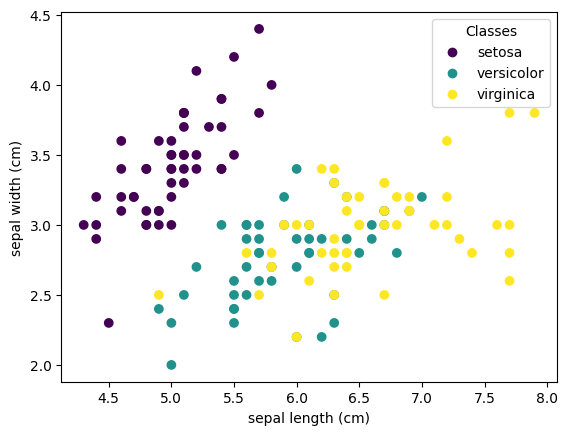

In [14]:
from sklearn import datasets
from sklearn.metrics import accuracy_score

iris = datasets.load_iris()

_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="upper right", title="Classes"
)

In [15]:
inputs = iris.data


# Since each prediction is a vector with a score for each of the three types of flowers,
# we need to make each target a vector with a 1 for the correct flower and a 0 for the others.
targets = np.zeros((len(iris.data), 3))
for i, t in enumerate(iris.target):
    targets[i, t] = 1

def accuracy(predictions, targets):
    one_hot_predictions = np.zeros(predictions.shape)

    for i, prediction in enumerate(predictions):
        one_hot_predictions[i, np.argmax(prediction)] = 1
    return accuracy_score(one_hot_predictions, targets)

print("Inputs shape: ", inputs.shape)
print("Output shape: ", targets.shape)

Inputs shape:  (150, 4)
Output shape:  (150, 3)


**a) What should the input size for the network be with this dataset? What should the output size of the last layer be?**

Since the input contains 150 samples each one with 4 features, the input size should be 4 neurons. In the same way, the targets have three different classes to distinguish so the output layer is of length 3.



**b) Create a network with two hidden layers, the first with sigmoid activation and the last with softmax, the first layer should have 8 “nodes”, the second has the number of nodes you found in exercise a). Softmax returns a “probability distribution”, in the sense that the numbers in the output are positive and add up to 1 and, their magnitude are in some sense relative to their magnitude before going through the softmax function. Remember to use the batched version of the create_layers and feed forward functions.**

In [16]:
layers = create_layers_batch(4, [8, 3])
activation_funcs = [sigmoid, softmax]

# c) Evaluate your model on the entire iris dataset!
predictions = feed_forward_batch(inputs, layers, activation_funcs)

# d) Compute the accuracy of your model using the accuracy function defined above
print("Accuracy: ", accuracy(predictions, targets))

Accuracy:  0.4066666666666667


# Exercise 7 - Training on real data

In [17]:
from autograd import grad

def cross_entropy(predict, target):
    return np.sum(-target * np.log(predict))


def cost(input, layers, activation_funcs, target):
    predict = feed_forward_batch(input, layers, activation_funcs)
    return cross_entropy(predict, target)

gradient_func = grad(cost, 1)  # Taking the gradient wrt. the second input to the cost function, i.e. the layers
gradient_func(inputs, layers, activation_funcs, targets)

[(array([[ 9.00964468e-04, -5.89360714e-07, -3.41258890e-01,
          -4.13266195e+00,  1.09305739e+00, -2.17536708e+01,
          -7.83804381e+00,  1.15196292e+00],
         [ 7.97953175e-04, -5.78830188e-07, -1.49267659e-01,
          -2.81302607e+00,  7.94098968e-01, -1.86162480e+01,
          -1.89558902e+00,  1.34159193e+00],
         [ 9.08095612e-05, -6.29244378e-08, -2.16745330e-01,
          -1.04616139e+00,  3.01513522e-01, -2.30146501e+00,
          -5.80475867e+00, -3.21724585e+00],
         [-2.15402542e-05,  4.11253381e-08, -4.97631942e-02,
          -1.47982723e-01,  4.70864687e-02,  8.42836201e-01,
          -8.77449422e-01, -1.88099321e+00]]),
  array([ 1.95032054e-04, -1.31063551e-07, -6.06967572e-02, -8.58581728e-01,
          2.18807992e-01, -4.46395549e+00, -1.27976258e+00,  6.23140500e-01])),
 (array([[-1.25877158e-04,  2.87587597e-04,  3.55952219e-04],
         [-8.17965844e-07, -4.02174104e-07, -4.42315718e-07],
         [-2.11440732e-01,  4.80852276e-02,  2.48

**a) What shape should the gradient of the cost function wrt. weights and biases be?**

Taking into account the neural network architecture, we have two weight matrices W1 and W2. Therefore, the derivative wrt $W_1$ is of shape $8\times 4$ and the derivative wrt $W_2$ is of shape $3\times 8$. In the same way, considering the dimensions of the layers, the derivatives wrt to $b_1$ and $b_2$ have shapes of $8$ and $3$ respectively.

**b) Use the gradient_func function to take the gradient of the cross entropy wrt. the weights and biases of the network. Check the shapes of what’s inside. What does the grad func from autograd actually do?**

The function calculates the numerical derivatives of the matrices and vectors evaluated at the real numbers.

In [18]:
layers_grad = gradient_func(
    inputs, layers, activation_funcs, targets
)  # Don't change this

In [19]:
# c) Finish the train_network function.

def train_network(
    inputs, layers, activation_funcs, targets, learning_rate=0.001, epochs=100
):
    for i in range(epochs):
        layers_grad = gradient_func(inputs, layers, activation_funcs, targets)
        for (W, b), (W_g, b_g) in zip(layers, layers_grad):
            W -= learning_rate * W_g
            b -= learning_rate * b_g

**e) What do we call the gradient method used above?**

We use the gradient function that takes the derivatives of all of the functions inside in the arguments and compute the gradientes with respecto to the argument 1.

In [32]:
# d) Train your network and see how the accuracy changes! Make a plot if you want

train_network(inputs, layers, activation_funcs, targets)
predictions = feed_forward_batch(inputs, layers, activation_funcs)
print("Accuracy: ", accuracy(predictions, targets))

Accuracy:  0.9866666666666667


Note that if we compile multiple times the code with the training function, the accuracy increases up to a steady value of 0.9866. Then, we slightly modify the above training_network function to return the evolution of the cost function along the epochs.   

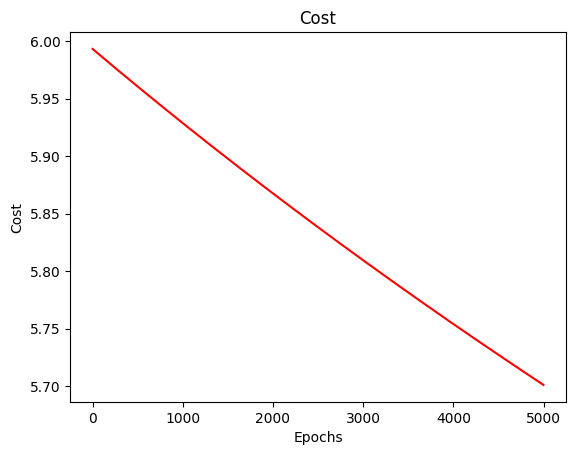

In [33]:
def train_network(
    inputs, layers, activation_funcs, targets, learning_rate=0.001, epochs=5000
):
    cost_value = []
    for i in range(epochs):
        layers_grad = gradient_func(inputs, layers, activation_funcs, targets)
        for (W, b), (W_g, b_g) in zip(layers, layers_grad):
            W -= learning_rate * W_g
            b -= learning_rate * b_g
        cost_value.append(cost(inputs, layers, activation_funcs, targets))
        predictions = feed_forward_batch(inputs, layers, activation_funcs)
    return cost_value

cost_value = train_network(inputs, layers, activation_funcs, targets)

#Plotting
plt.plot(cost_value, "r-")
plt.title("Cost")
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.show()

plt.show()

In [34]:
print("Accuracy: ", accuracy(predictions, targets))

Accuracy:  0.9866666666666667


**e) How high of an accuracy is it possible to acheive with a neural network on this dataset, if we use the whole thing as training data?**

We can see that the maximum accuracy that can be achieved is about 98.6%, this could be seen by compiling the training several times in a row and increasing the number of epochs.